Plot the horizon distance for Advanced LIGO detector (assuming ’H1’ noise PSD) assuming a set of equal mass binary with a range of component masses between 5 to 500. In this plot, you can assume that X-axis and Y-axis represent the total mass of the binary and horizon distance, respectively. 

In [9]:
'First we compute the optimal SNR ver total mass of the system. '
from pycbc.filter import sigmasq
import pycbc.noise
import pycbc.psd
import pylab
from pycbc.waveform import get_fd_waveform
import numpy as np




m1 = np.arange(2, 2000, 1)
m2 = m1
SNR_list_aLIGO = []



# Taking aLIGO design sensitivity
flow = 4.0
delta_f = 1.0 / 16
flen = int(2048.0/ (delta_f)) + 1
psd_aLIGO = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
psd = psd_aLIGO

psd.data[:int(flow/delta_f)] = np.inf
psd.data[-1] = np.inf

for i in range(len(m1)):
    hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=m1[i],
                         mass2=m2[i],
                         delta_f=1.0/(16.0) ,
                         distance = 1000, 
                         f_lower=5.0, f_final = 2048.0)    #d = 4000 Mpc
    
    
    #SNR1 = (pycbc.filter.sigmasq(hp, psd))**0.5
    SNR1 = (np.sum((4*hp*np.conj(hp)*hp.delta_f/psd).data).real)**0.5
    SNR_list_aLIGO.append(SNR1)
    
    
SNR_list_aLIGO = np.array(SNR_list_aLIGO)




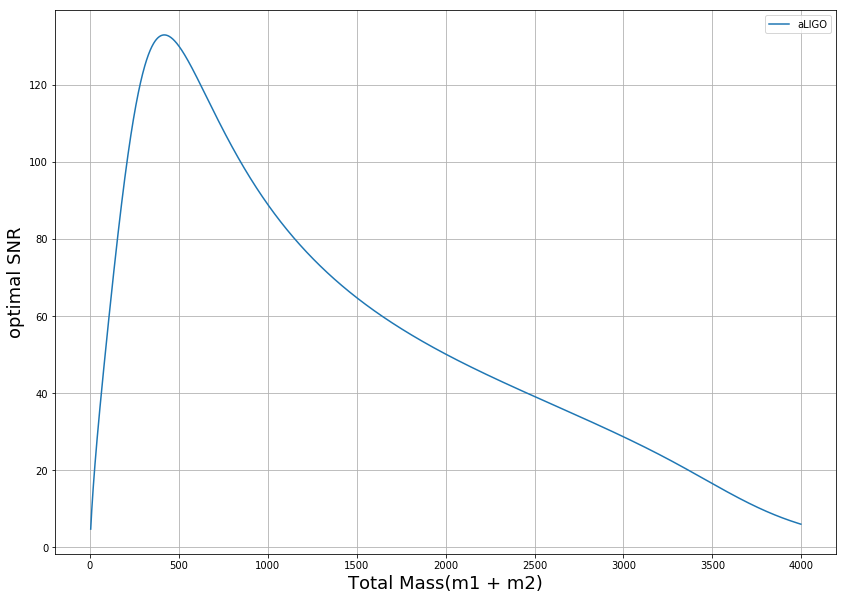

In [12]:

'''
Plot of SNR
'''

pylab.figure(figsize=(14,10))

pylab.plot(m1 + m2, SNR_list_aLIGO, label = 'aLIGO')
pylab.ylabel('optimal SNR', size = 18)
pylab.xlabel('Total Mass(m1 + m2)', size = 18)
pylab.grid()
pylab.legend()

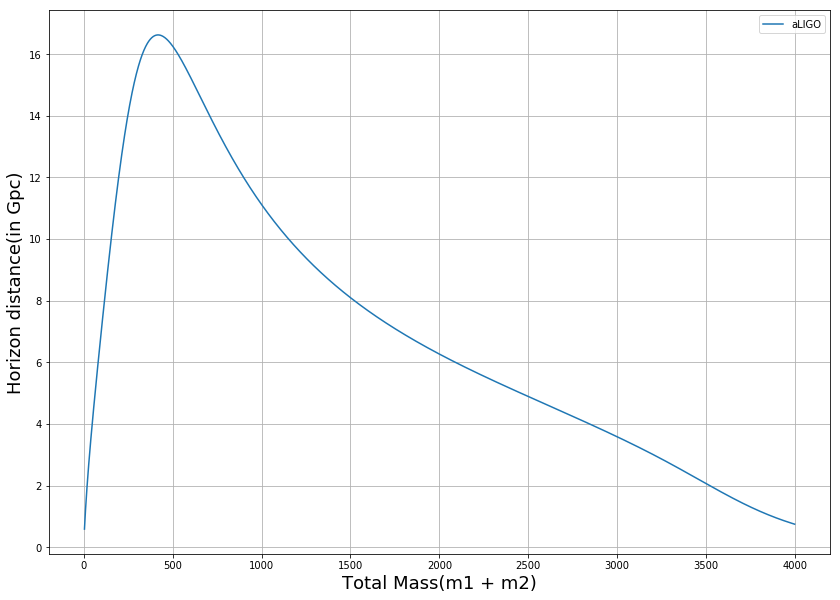

In [16]:
'''
Calculation of horzon distance
'''


'''
As we know that SNR is inversely proportional to distance. 
In the previous SNR plot distnace was 1000 Mpc. 
Hence, In order to find horizon distance we need to find the distnace for which SNR is 8
'''
Horizon_dist = SNR_list_aLIGO * 1000/8.0  #unit in Mpc
Horizon_dist = Horizon_dist/1000 #unit in Gpc

pylab.figure(figsize=(14,10))

pylab.plot(m1 + m2, Horizon_dist, label = 'aLIGO')
pylab.ylabel('Horizon distance(in Gpc)', size = 18)
pylab.xlabel('Total Mass(m1 + m2)', size = 18)
pylab.grid()
pylab.legend()

From the plot of horizon distance, you will see the curve reaches its maximum value for a massive black hole. After that, the horizon distance decreases over mass. Can you explain why do we see such behavior? What can you interpret from the point of view of the detector’s capability to detect GWs from the compact binary merger?


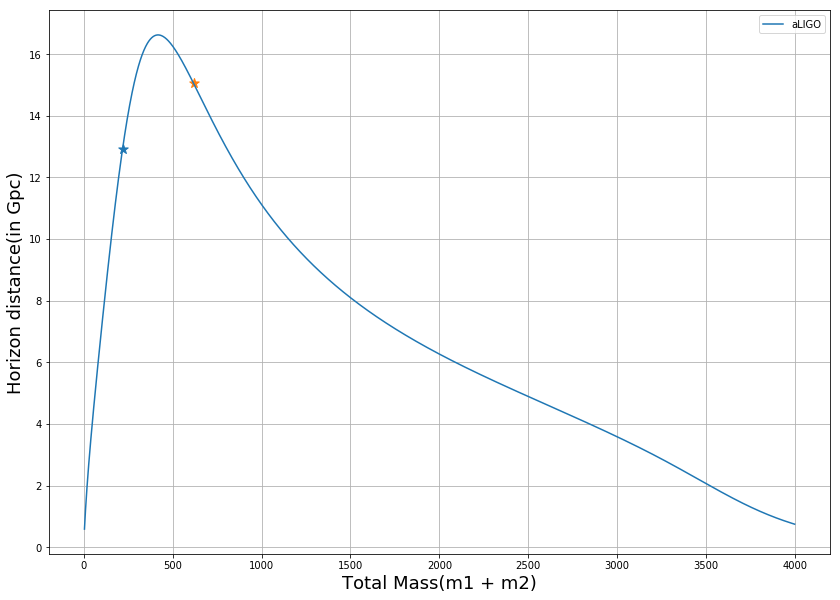

In [32]:
'''
Lets chose two poins from the horizon distance plot(marked in '*' in the plot)
'''
pylab.figure(figsize=(14,10))

pylab.plot(m1 + m2, Horizon_dist, label = 'aLIGO')
ii = np.where(Horizon_dist == max(Horizon_dist))
M_tot = m1+ m2
pylab.scatter(M_tot[ii[0][0] - 100], Horizon_dist[ii[0][0] - 100], marker = "*", s= 100 )
pylab.scatter(M_tot[ii[0][0] + 100], Horizon_dist[ii[0][0] + 100],  marker = "*" , s = 100)


pylab.ylabel('Horizon distance(in Gpc)', size = 18)
pylab.xlabel('Total Mass(m1 + m2)', size = 18)
pylab.grid()
pylab.legend()

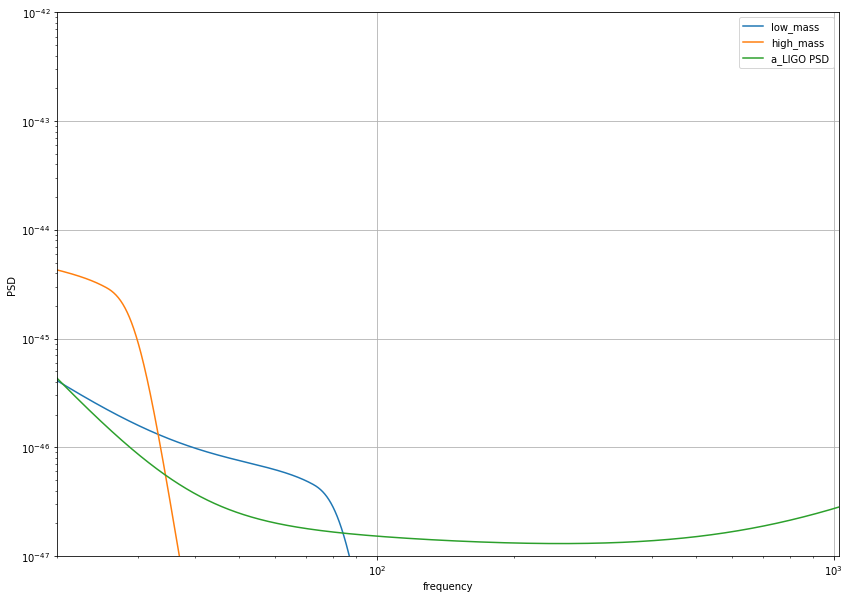

In [36]:
'''
Now for this two points estimate |h(f)|^2 df
'''

m1 = M_tot[ii[0][0] - 100]/2.0
m2 = m1
hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=m1,
                         mass2=m2,
                         delta_f=1.0/(16.0) ,
                         distance = 1000, 
                         f_lower=5.0, f_final = 2048.0)    #d = 4000 Mpc
    
    
h1_f = hp*np.conj(hp)*hp.delta_f
    

m1 = M_tot[ii[0][0] + 100]/2.0
m2 = m1

hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=m1,
                         mass2=m2,
                         delta_f=1.0/(16.0) ,
                         distance = 1000, 
                         f_lower=5.0, f_final = 2048.0)    #d = 4000 Mpc
    
    
h2_f = hp*np.conj(hp)*hp.delta_f
psds = psd
pylab.figure(figsize=(14,10))

pylab.loglog(psds.sample_frequencies, h1_f, label = 'low_mass')
pylab.loglog(psds.sample_frequencies, h2_f, label ='high_mass')
pylab.loglog(psds.sample_frequencies, psds, label ='a_LIGO PSD')


pylab.ylabel('PSD')
pylab.xlabel('frequency')
pylab.xlim(20, 1024)
pylab.ylim(1e-47, 1e-42)
pylab.grid()
pylab.legend()

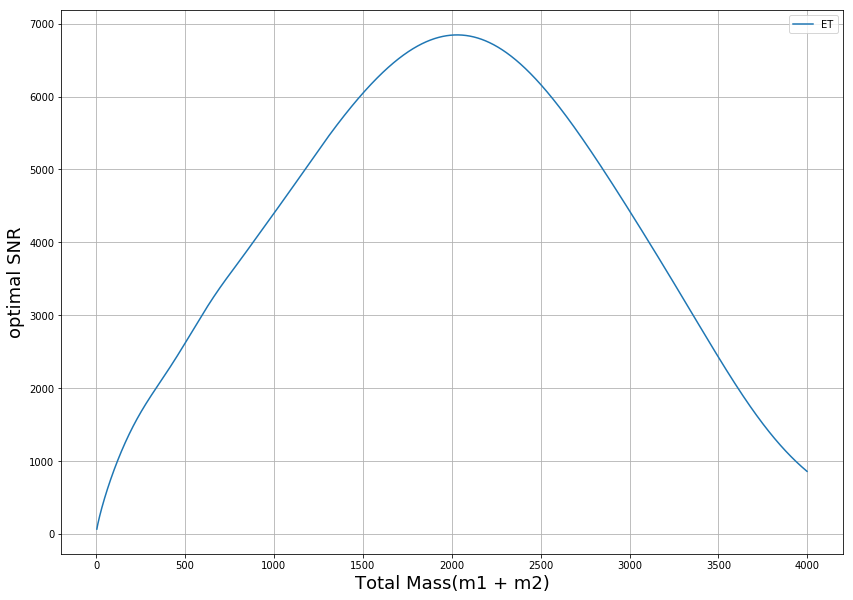

In [40]:
m1 = np.arange(2, 2000, 1)
m2 = m1
SNR_list_ET = []
from pycbc.filter import sigmasq

import pycbc.noise
import pycbc.psd
import pylab

# generate some colored gaussian noise
flow = 4.0
delta_f = 1.0 / 16
flen = int(2048.0/ (delta_f)) + 1
psd = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow)

psd.data[:int(flow/delta_f)] = np.inf
psd.data[-1] = np.inf


for i in range(len(m1)):
    hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=m1[i],
                         mass2=m2[i],
                         delta_f=1.0/(16.0) ,
                         distance = 1000, 
                         f_lower=5.0, f_final = 2048.0)    #d = 4000 Mpc
    
    #SNR1 = (pycbc.filter.sigmasq(hp, psd))**0.5
    SNR1 = (np.sum((4*hp*np.conj(hp)*hp.delta_f/psd).data).real)**0.5
    SNR_list_ET.append(SNR1)
    
    
SNR_list_ET = np.array(SNR_list_ET)

'''
Plot of SNR
'''

pylab.figure(figsize=(14,10))
pylab.plot(m1 + m2, SNR_list_ET, label = 'ET')
pylab.ylabel('optimal SNR', size = 18)
pylab.xlabel('Total Mass(m1 + m2)', size = 18)
pylab.grid()
pylab.legend()

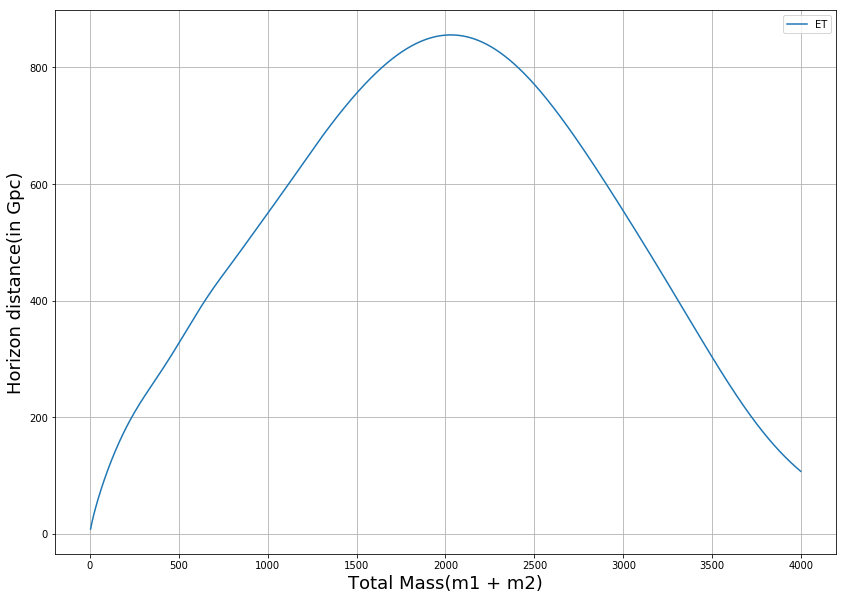

In [41]:
'''
Calculation of horzon distance
'''


'''
As we know that SNR is inversely proportional to distance. 
In the previous SNR plot distnace was 1000 Mpc. 
Hence, In order to find horizon distance we need to find the distnace for which SNR is 8
'''
Horizon_dist = SNR_list_ET * 1000/8.0  #unit in Mpc
Horizon_dist = Horizon_dist/1000 #unit in Gpc

pylab.figure(figsize=(14,10))

pylab.plot(m1 + m2, Horizon_dist, label = 'ET')
pylab.ylabel('Horizon distance(in Gpc)', size = 18)
pylab.xlabel('Total Mass(m1 + m2)', size = 18)
pylab.grid()
pylab.legend()